In [28]:
import pandas as pd
import json
import numpy as np

In [30]:
with open('parameters_mexico_2017.json', 'r') as f:
    data = json.load(f)

parameters_values = {k: pd.Series(v['data']).fillna(0) for k,v in data.items()}

In [31]:
from graphmodels.graphmodel import *

In [32]:
sub_model_0 = [
    {'type': 'parameter', # Type of node (input, output, variable, parameter)
     'unit': '', # Unit
     'id': 'CRfd', # Unique code to define the node
     'name':'feed/forage distribution (correction)', # Full name 
     'in': ['TAFDi2017_cal', 'FDi2017'], # Specify what comes into the node    
     'computation': {'name': 'SUM(TAFDi2017)/sum(FDi2017)', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: sum(X['TAFDi2017_cal'])/sum(X['FDi2017'])} # For now leave the formula field empty
    },
    {'type': 'variable', 
     'id': 'TFFD_2017',
     'name': 'Total fodder/forage demand',
     'unit': 'x 1000t',
     'in': ['FDi2017', 'TAFDi2017_cal'], # Specify what comes into the node
     'computation': {'name': 'SUM(TAFDi2017_cal) - SUM(FDi2017)', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: sum(X['TAFDi2017_cal'])- sum(X['FDi2017'])} # For now leave the formula field empty
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'FDi2017', # Unique code to define the node
     'name':'Vector feed demand', # Full name     

    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': 'kg', # Unit
     'id': 'TAFDi2017_cal', # Unique code to define the node
     'name':'vector total animal feed demand', # Full name 
     'in': ['FCRi', 'AYi2017', 'ANPi_cal'], # Specify what comes into the node    
     'computation': {'name': '(FRCi*AYi2017*ANPi_cal)/1000000', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: (X['FCRi'][0:6] * X['AYi2017'][0:6] * X['ANPi_cal']) /1000000} # For now leave the formula field empty
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': 'kg/animal', # Unit
     'id': 'AYi2017', # Unique code to define the node
     'name':'Vector of animal yields', # Full name     

    },
    {'type': 'parameter', # Type of node (input, output, variable, parameter)
     'unit': 'kg DM feed/ kg EW', # Unit
     'id': 'FCRi', # Unique code to define the node
     'name':'feed conversion ratio (kg/animal)', # Full name     

    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': 'heads', # Unit
     'id': 'ANPi_cal', # Unique code to define the node
     'name':'Vector animals needed for production', # Full name  
     'in': ['FDi_an2017', 'AYi2017'], # Specify what comes into the node
     'computation': {'name': '(FDi_an2017*1000000)/AYi2017', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: (X['FDi_an2017']*1000000)/X['AYi2017'][:6] } # For now leave the formula field empty   

    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': 'heads', # Unit
     'id': 'FDi_an2017', # Unique code to define the node
     'name':'selection animal-based food groups', # Full name  
     'in': ['FDTi_animal2017'], # Specify what comes into the nod
     'computation': {'name': 'Selection animal-based food groups', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: np.array([X['FDTi_animal2017'][0], X['FDTi_animal2017'][2], X['FDTi_animal2017'][3] , X['FDTi_animal2017'][7] , 
                                                   X['FDTi_animal2017'][8], (X['FDTi_animal2017'][1]+X['FDTi_animal2017'][4])])} #selects the food groups that are animal based 
    },
    {'type': 'output', 
     'id': 'FDTi_animal2017',
     'name': 'Vector total food demand (animals/other)',
     'unit': 'x 1000 tonne',
     'in': ['FPi'], # Specify what comes into the node
     'computation': {'name': 'FPi selection animal products', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: X['FPi'][13:25]} # For now leave the formula field empty
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'FPi', # Unique code to define the node
     'name':'Vector food production', # Full name     
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '', # Unit
     'id': 'CD_corr', # Unique code to define the node
     'name':'correction parameter crop demand (calibrated for 2017)', # Full name 
     'in': ['TCropDi_cal', 'TCL2017i' ], # Specify what comes into the node
     'computation': {'name': '', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: X['LU2017i'][6]/(sum(X['TCropDi_cal'])/1000)} # For now leave the formula field empty     
    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': 'ha', # Unit
     'id': 'TCropDi_cal', # Unique code to define the node
     'name':'Vector total cropland demand', # Full name 
     'in': ['FDTi_conv_cal','CYi'], # Specify what comes into the node
     'computation': {'name': '(FDTi_conv_cal*1000000/(CYi/10)', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: (X['FDTi_conv_cal']*1000000) / (X['CYi']/10)} # For now leave the formula field empty
    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': 'x 1000t', # Unit
     'id': 'FDTi_conv_cal', # Unique code to define the node
     'name':'Vector total food demand (aggregated for each crop group)', # Full name 
     'in': ['FDTi_total', 'CYi', 'TCL2017i'], # Specify what comes into the node
     'computation': {'name': '', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: np.array([X['FDTi_total'][0], X['FDTi_total'][9], X['FDTi_total'][6], X['FDTi_total'][4], X['FDTi_total'][1],
                                                   X['FDTi_total'][2], X['FDTi_total'][5], X['FDTi_total'][8], 
                                                   (X['CYi'][8] / 1000000) * (X['TCL2017i'][8]/10) ])} # For now leave the formula field empty
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': 'ha', # Unit
     'id': 'TCL2017i', # Unique code to define the node
     'name':'Vector land used for crops in 2017', # Full name
    },    
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': 'kg/capita/yr', # Unit
     'id': 'FDKG2017_i', # Unique code to define the node
     'name':'Vector KG food demand', # Full name
    },   
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': 'kcal/capita/day', # Unit
     'id': 'FDKC2017_i', # Unique code to define the node
     'name':'Vector of KCAL food demand', # Full name
    },   
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': 'hg/ha', # Unit
     'id': 'CYi', # Unique code to define the node
     'name':'Vector crop yields', # Full name
    },      
    {'type': 'variable', 
     'id': 'KKRi',
     'name': 'Vector Kcal/kg ratio 2017',
     'unit': 'Kcal/kg',
     'in': ['FDKG2017_i', 'FDKC2017_i'], # Specify what comes into the node
     'computation': {'name': 'FDKC2017_i/(FDKG2017_i/365)', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: (X['FDKC2017_i'] / (X['FDKG2017_i'] /365)) } # For now leave the formula field empty

    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': '%', # Unit
     'id': 'SSRi', # Unique code to define the node
     'name':'Self-sufficiency ratio', # Full name   
     'in': ['FPi', 'FEi', 'FIi'], # Specify what comes into the node
     'computation': {'name': '100*FPi/(FPi-FEi+FIi)', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: (100 * X['FPi'])/ (X['FPi'] - X['FEi'] + X['FIi'])} # For now leave the formula field empty  
    },

    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'FPi', # Unique code to define the node
     'name':'Vector food production', # Full name     
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'FEi', # Unique code to define the node
     'name':'Vector food exports', # Full name     
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'FIi', # Unique code to define the node
     'name':'Vector food imports', # Full name     
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': 'population', # Unit
     'id': 'P', # Unique code to define the node
     'name':'Total population', # Full name     
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': 'x 1000 t', # Unit
     'id': 'FLO2017i', # Unique code to define the node
     'name':'Food losses', # Full name     
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': 'kcal/cap/day', # Unit
     'id': 'FWP2017i', # Unique code to define the node
     'name':'Vector food waste 2017', # Full name
     'in': ['FLO2017i', 'P', 'KKRi'], # Specify what comes into the node
     'computation': {'name': '(FLO2017i*KKRi*(1000000/365))/P', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: (X['FLO2017i']*X['KKRi']*(1000000/365))/X['P'] } # For now leave the formula field empty    
    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': 'heads', # Unit
     'id': 'ANPi_calc', # Unique code to define the node
     'name':'Vector animals needed for production', # Full name  
     'in': ['FDi_an2017', 'AYi2017'], # Specify what comes into the node
     'computation': {'name': '(FDi_an2017*1000000)/AYi2017', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: (X['FDi_an2017']*1000000)/X['AYi2017'][:6] } # For now leave the formula field empty   

    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'FDi', # Unique code to define the node
     'name':'Vector total domestic food production', # Full name
     'in': ['KKRi','SSRi', 'TCDi'], # Specify what comes into the node
     'computation': {'name': '(TCDi * SSRi/100 * 365)/KKRi', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: (X['TCDi'] * X['SSRi']/100 * 365)/ X['KKRi'] } # For now leave the formula field empty
    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'OFi', # Unique code to define the node
     'name':'Other food demand', # Full name
     'in': ['SDi', 'NFDi', 'PDi', 'RDi','SVi'], # Specify what comes into the node
     'computation': {'name': 'SDi+NFDi+PDi+RDi+SVi', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: X['SDi']+X['NFDi']+X['PDi']+X['RDi']+X['SVi']} # For now leave the formula field empty
    },     
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'SDi', # Unique code to define the node
     'name':'Vector seed demand', # Full name
    },

    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'NFDi', # Unique code to define the node
     'name':'Vector non-food demand', # Full name
    },    
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'PDi', # Unique code to define the node
     'name':'Vector processed demand', # Full name
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'RDi', # Unique code to define the node
     'name':'Vector residual demand', # Full name
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'SVi', # Unique code to define the node
     'name':'Vector stock variation', # Full name
    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': 'kcal/day', # Unit
     'id': 'TCDi', # Unique code to define the node
     'name':'Total calorie demand per food group', # Full name
     'in': ['P', 'FWP2017i','FDKC2017_i'], # Specify what comes into the node
     'computation': {'name': 'P*(FDKC2017_i+FWP2017i)', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: X['P']*(X['FDKC2017_i']+X['FWP2017i'])} # For now leave the formula field empty          
    },    
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'AFDi', # Unique code to define the node
     'name':'Vector total animal feed demand', # Full name
     'in': ['FMi', 'FD'], # Specify what comes into the node
     'computation': {'name': 'FMi * FD', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: X['FMi'][0:13] * X['FD'] } # For now leave the formula field empty
    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': '', # Unit
     'id': 'FMi', # Unique code to define the node
     'name':'Feed mix fraction', # Full name     
     'in': ['FDi2017'], # Specify what comes into the node
     'computation': {'name': 'FDi2017/SUM(FDI2017)', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: X['FDi2017']/sum(X['FDi2017'])} # For now leave the formula field empty
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': '1000 t', # Unit
     'id': 'FDi2017', # Unique code to define the node
     'name':'Vector feed demand', # Full name     
    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': '1ooo t', # Unit
     'id': 'FD', # Unique code to define the node
     'name':'Total crop-feed demand', # Full name 
     'in': ['TAFDi', 'CRfd'], # Specify what comes into the node    
     'computation': {'name': 'SUM(TAFDi)/CRfd', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: sum(X['TAFDi'])/X['CRfd']} # For now leave the formula field empty
    },
    {'type': 'parameter', # Type of node (input, output, variable, parameter)
     'unit': '', # Unit
     'id': 'CRfd', # Unique code to define the node
     'name':'feed/forage distribution (correction)', # Full name 
    },
    {'type': 'variable', # Type of node (input, output, variable, parameter)
     'unit': 'kg', # Unit
     'id': 'TAFDi', # Unique code to define the node
     'name':'vector total animal feed demand', # Full name 
     'in': ['FCRi', 'AYi2017', 'ANPi_calc'], # Specify what comes into the node    
     'computation': {'name': '(FRCi*AYi2017*ANPi_calc)/1000000', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: (X['FCRi'][0:6] * X['AYi2017'][0:6] * X['ANPi_calc']) /1000000} # For now leave the formula field empty
    },
    {'type': 'input', # Type of node (input, output, variable, parameter)
     'unit': 'kg/animal', # Unit
     'id': 'AYi2017', # Unique code to define the node
     'name':'Vector of animal yields', # Full name     
    },
    {'type': 'parameter', # Type of node (input, output, variable, parameter)
     'unit': 'kg DM feed/ kg EW', # Unit
     'id': 'FCRi', # Unique code to define the node
     'name':'feed conversion ratio (kg/animal)', # Full name     
    },
    {'type': 'output', 
     'id': 'FDTi_crops',
     'name': 'Vector total food demand (crops)',
     'unit': 'x 1000 tonne',
     'in': ['FDi', 'OFi', 'AFDi', 'SSRi'], # Specify what comes into the node
     'computation': {'name': 'SSRi/100*(OFi+AFDi)+FDi', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: ((X['SSRi'][0:13]/100)*(X['OFi'][0:13] + X['AFDi'][0:13])) + (X['FDi'][0:13]/1000000)} # For now leave the formula field empty
    },
    {'type': 'output', 
     'id': 'FDTi_animal',
     'name': 'Vector total food demand (animals/other)',
     'unit': 'x 1000 tonne',
     'in': ['FDi', 'OFi', 'FDi2017', 'SSRi'], # Specify what comes into the node
     'computation': {'name': 'SSRi/100*(OFi+AFDi)+FDi', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: ((X['SSRi'][13:25]/100)*(X['OFi'][13:25] + X['FDi2017'][13:25])) + X['FDi'][13:25]/1000000} # For now leave the formula field empty
    },
    {'type': 'output', 
     'id': 'FDTi_total',
     'name': 'Vector total food demand all',
     'unit': 'x 1000 tonne',
     'in': ['FDTi_animal', 'FDTi_crops'], # Specify what comes into the node
     'computation': {'name': 'FDTi_animal+FDTi_crops', # When the node is compulationnal specify the computation like this
                    'formula': lambda X: np.append(X['FDTi_crops'],X['FDTi_animal']) } # For now leave the formula field empty
    }
]

G = GraphModel(sub_model_0)

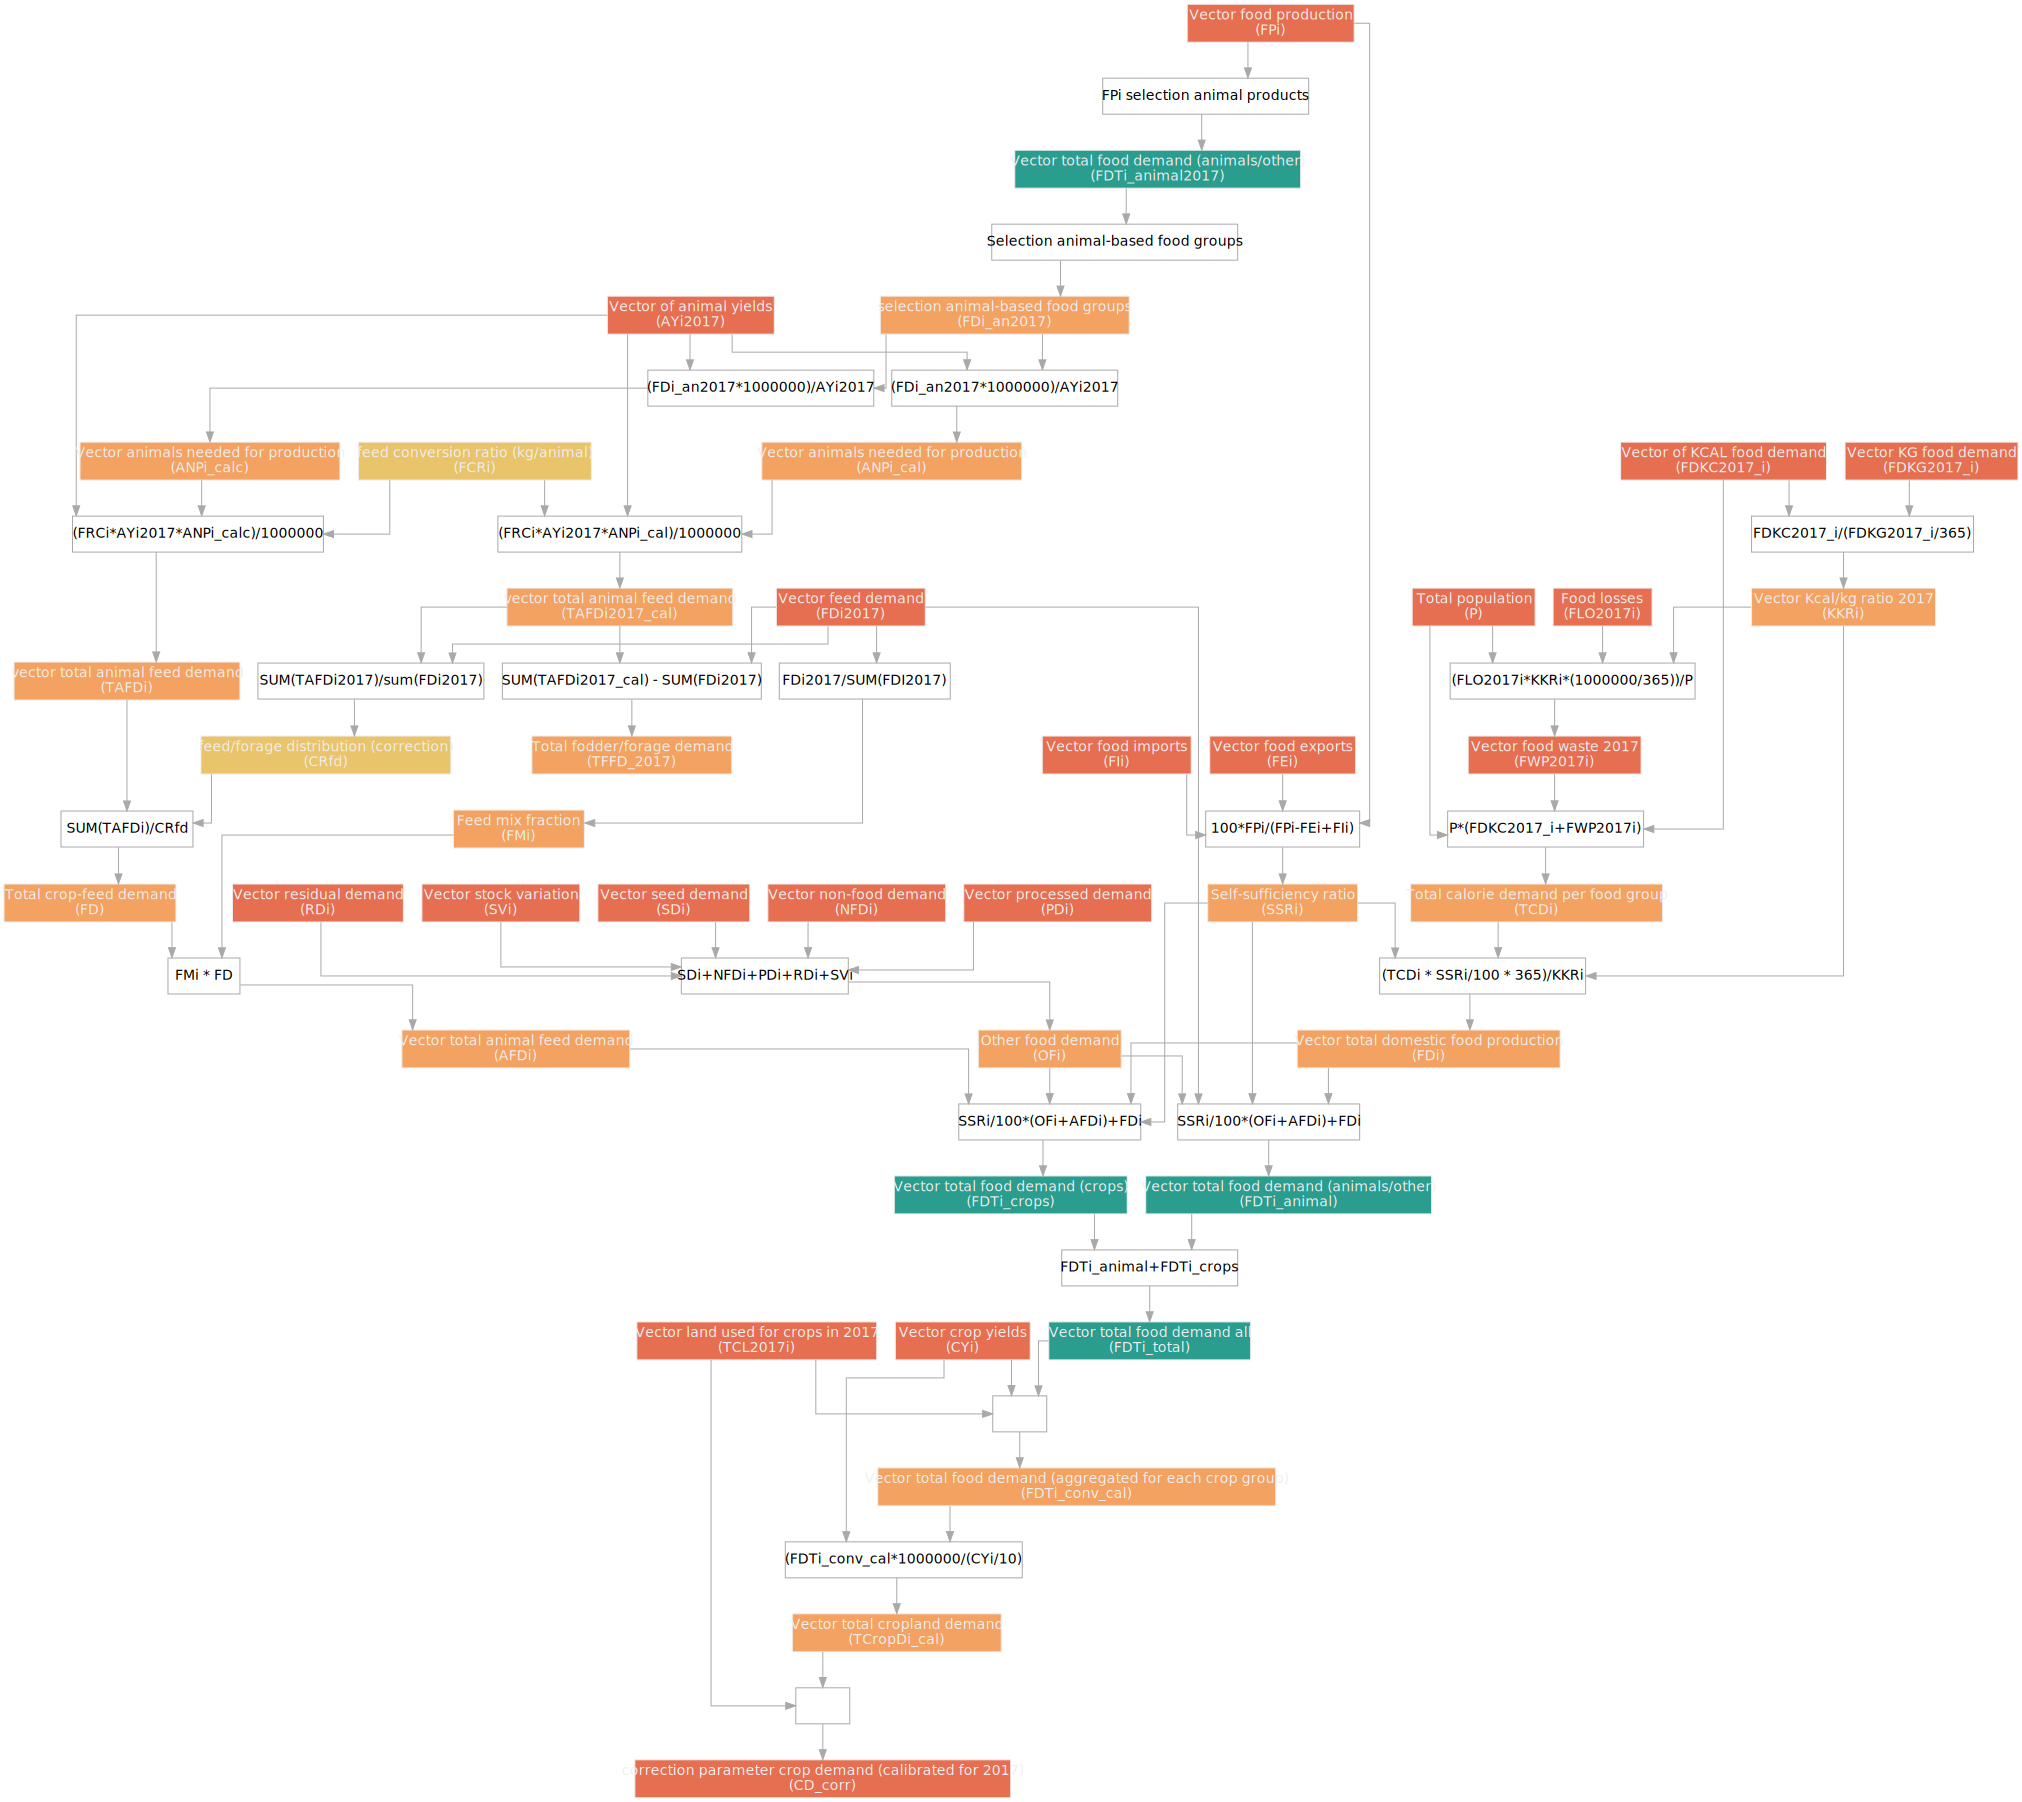

In [33]:
G.draw()

In [40]:
res = G.run(parameters_values, parameters_values)

OFi_comp
Alcoholic Beverages          8282.0
Animal fats                   332.0
Aquatic Products, Other        38.0
Bovine meat                  1773.0
Cereals - Excluding Beer    26873.0
Eggs                         2540.0
Fish, Seafood                1958.0
Fruits - Excluding Wine     13747.0
Meat, other                    81.0
Milk - Excluding Butter     14835.0
Miscellaneous                  51.0
Mutton & Goat meat            106.0
Offals                        660.0
Oilcrops                     7224.0
Pigmeat                      2078.0
Poultry meat                 4052.0
Pulses                       1445.0
Spices                        207.0
Starchy Roots                2269.0
Stimulants                    107.0
Sugar & Sweeteners           6201.0
Sugar Crops                 52059.0
Treenuts                      200.0
Vegetable Oils               1582.0
Vegetables                   9410.0
dtype: float64
KKRi_comp
Alcoholic Beverages           433.465286
Animal fats              

In [41]:
G.nodes['OFi_comp']

{'formula': <function __main__.<lambda>(X)>,
 'name': 'SDi+NFDi+PDi+RDi+SVi',
 'out': 'OFi',
 'in': ['SDi', 'NFDi', 'PDi', 'RDi', 'SVi'],
 'type': 'computationnal'}

In [39]:
parameters_values['NFDi']

Alcoholic Beverages           0.0
Animal fats                   0.0
Aquatic Products, Other       0.0
Bovine meat                   0.0
Cereals - Excluding Beer    370.0
Eggs                        131.0
Fish, Seafood                 0.0
Fruits - Excluding Wine       0.0
Meat, other                   0.0
Milk - Excluding Butter       0.0
Miscellaneous                 0.0
Mutton & Goat meat            0.0
Offals                        0.0
Oilcrops                     16.0
Pigmeat                       0.0
Poultry meat                  0.0
Pulses                       91.0
Spices                        0.0
Starchy Roots                52.0
Stimulants                    0.0
Sugar & Sweeteners            0.0
Sugar Crops                   0.0
Treenuts                      0.0
Vegetable Oils                0.0
Vegetables                    0.0
dtype: float64

In [26]:
res['TCropDi_cal']

Cereals, Total                  NaN
Fibre Crops Primary             NaN
Fruit Primary                   NaN
Oilcrops                        NaN
Pulses, Total                   NaN
Roots and Tubers, Total         NaN
Sugar Crops Primary             NaN
Treenuts, Total                 NaN
Vegetables Primary         704758.0
dtype: float64